# Statistical Significant Dependance, Difference and Correlations
* Author: Johannes Maucher
* Last Update: 2017-09-26    
* Topics of this notebook
    * $\chi^2$-test for determining independence of categorical variables
    * $t$-tests for determining statistical difference
    * Calculation of significant correlations


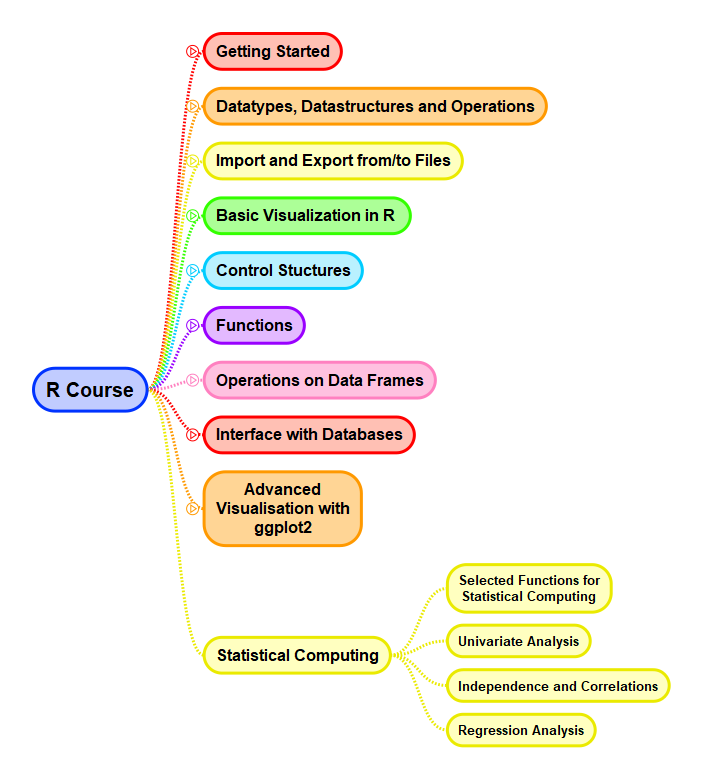

In [1]:
library("IRdisplay")
display_png(file="../../../Pics/DSRstatistical.PNG",width=900) 

In [9]:
insurance<-read.csv(file="../data/insurance.csv", header=T,sep=",",stringsAsFactors = TRUE)

In [10]:
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [11]:
factor_cols <- c("sex", "smoker", "region")
numeric_cols <- c("age", "bmi", "children","charges")

## Test independence of 2 random variables
If two random variables $A$ and $B$ are independent, then $P(A \cap B)=P(A) \cdot P(B)$. Hence, independence can be tested by determining the difference between the joint probability $P(A \cap B)$ and the product $P(A) \cdot P(B)$. If this difference is small, then the 2 variables can be assumed to be independent. 

$D_A$ and $D_B$ are the domains of the categorical variables $A$ and $B$ and $|D_A|$ and $|D_B|$ are the number of elements in domain $A$ and $B$, respectively.

**Example:** Check if the two variables *smoker* and *region* in the *insurance*-dataset are independent. For this first the frequency table of the two variables and the corresponding table of joint probabilities $P(smoker=x \cap region=y)$ is calculated, with $x \in D_s$ and $y \in D_r$, with $D_s=\{no,yes\}$ and $D_r=\{ne,nw,se,sw\}$, respectively (the elements of $D_r$ are the abbreviations for the four regions *northeast,...,southwest*). 

In [12]:
sprintf("Frequency Table:")
(smoker_region<-table(insurance$smoker,insurance$region))
sprintf("Table of joint probabilities:")
(prop_Tab<-addmargins(prop.table(smoker_region)))

[1] "Frequency Table:"

     
      northeast northwest southeast southwest
  no        257       267       273       267
  yes        67        58        91        58

[1] "Table of joint probabilities:"

,northeast,northwest,southeast,southwest,Sum
no,0.19207773,0.19955157,0.20403587,0.19955157,0.7952167
yes,0.05007474,0.04334828,0.06801196,0.04334828,0.2047833
Sum,0.24215247,0.24289985,0.27204783,0.24289985,1.0000000


The product of A-priori probabilities $P(smoker=no) \cdot P(region=y)$ is:

In [13]:
prop_Tab['no','Sum']*prop_Tab['Sum',]

northeast northwest southeast southwest       Sum 
0.1925637 0.1931580 0.2163370 0.1931580 0.7952167

And the difference between the product and the joint probabilities $P(smoker=no \cap region=y)$: 

In [14]:
(diffsNo<-prop_Tab['no',]-prop_Tab['no','Sum']*prop_Tab['Sum',])

northeast     northwest     southeast     southwest           Sum 
-0.0004859673  0.0063935419 -0.0123011165  0.0063935419  0.0000000000

In the same way the differences $$P(smoker=yes \cap region=y)-P(smoker=yes) \cdot P(region=y)$$ can be calculated:

In [15]:
prop_Tab['yes',]-prop_Tab['yes','Sum']*prop_Tab['Sum',]

northeast     northwest     southeast     southwest           Sum 
 0.0004859673 -0.0063935419  0.0123011165 -0.0063935419  0.0000000000

Since all the differences are marginal one can conclude, that the two variables are independent.

### Chi-Square Test for determining independence of categorial variables
The chi-square test of independence is based on the idea, which has been described above: *If two variables are independent, then the difference between the joint probability $P(A \cap B)$ and the product $P(A) \cdot P(B)$ * must be marginal. The chi-square defines a metric for measuring the difference between $P(A \cap B)$ and the product $P(A) \cdot P(B)$. This metric is $$\chi^2=\sum\limits_{i \in D_A} \sum\limits_{j \in D_B} \frac{(f_{ij}-e_{ij})^2}{e_{ij}},$$
where $f_{ij}$ is the observed frequency count of events belonging to both $A=i$ and $B=j$. The values $e_{ij}$ are the corresponding expected count if $A$ and $B$ are independent. It is assumed that the $\chi^2$-value is distributed according to a [$\chi^2$-distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) with $$k=|D_A-1|\cdot |D_B-1|$$ degrees of freedom.

The probability-density function of $\chi^2$-distributions for different degrees of freedom are plotted in the code cell below:

[1] 801

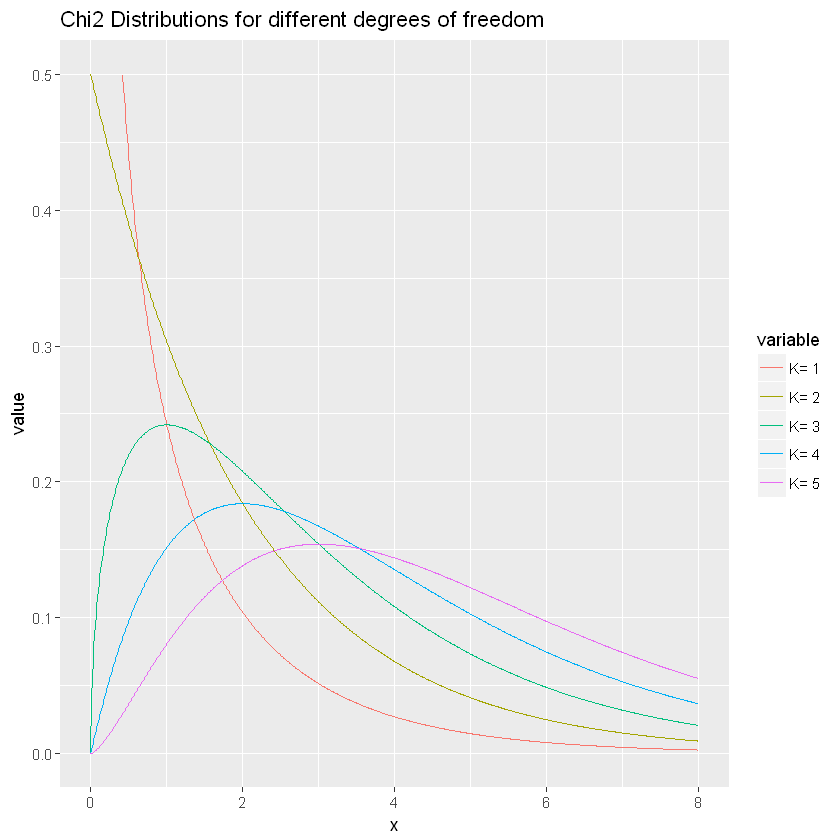

In [21]:
#options(repos=structure(c(CRAN="http://cloud.r-project.org/")))
#install.packages("reshape")
library(ggplot2)
library(reshape) # provides the melt()-function
S<-800
maxK<-5
k<-1:maxK
colnam<-c("x")
xvals<-pretty(c(0,8),S)
length(xvals)
mat <- matrix(, nrow = S+1, ncol = maxK+1)
mat[,1]<-xvals
for(column in 1:maxK){
  mat[, column+1] <- dchisq(xvals,df=k[column])
  colnam<-append(colnam,paste("K=",column))  
}
R<-as.data.frame(mat)
colnames(R)<-colnam
meltR <- melt(R, id = "x")
ggplot(meltR, aes(x = x, y = value, group = variable, colour = variable)) + 
geom_line()+
ylim(0,0.5)+
labs(title="Chi2 Distributions for different degrees of freedom")

The values $f_{ij}$ and $e_{ij}$ are calculated as shown in the following code cells:

The values $f_{ij}$ are the elements of the joint frequency table (see below). The last column in this table contains the frequency count $n_{yes}$ for $smoker=yes$  and the frequency count $n_{no}$ for $smoker=no$, respectively. The last row in this table contains the frequency count $n_{ne}, n_{nw}, n_{se}, n_{sw},$ for the four different regions. The element in the last column and the last row of this matrix is the total count $n$. Then, for example, the value $e_{no,sw}$ can be calculated as follows: $$e_{no,sw}=\frac{n_{no}n_{sw}}{n}=\frac{1064 \cdot 325}{1338}=258.44.$$

In [22]:
(marg_Tab<-addmargins(smoker_region))

,northeast,northwest,southeast,southwest,Sum
no,257,267,273,267,1064
yes,67,58,91,58,274
Sum,324,325,364,325,1338


From this table, the overall $\chi^2$-value can be calculated as follows:

In [23]:
n<-marg_Tab['Sum','Sum']
chi2<-sum((marg_Tab['no',]-marg_Tab['no','Sum']*marg_Tab['Sum',]/n)**2/(marg_Tab['no','Sum']*marg_Tab['Sum',]/n),
    (marg_Tab['yes',]-marg_Tab['yes','Sum']*marg_Tab['Sum',]/n)**2/(marg_Tab['yes','Sum']*marg_Tab['Sum',]/n))
sprintf("Chi-Square Value = %f",chi2)

[1] "Chi-Square Value = 7.343478"

#### Applying R's chisq.test() function

The Chi-Square test is already available in the R base package. It can be applied as follows:

In [24]:
chisq.test(smoker_region)


	Pearson's Chi-squared test

data:  smoker_region
X-squared = 7.3435, df = 3, p-value = 0.06172


As the p-value 0.06172 is greater than the .05 significance level, we do not reject the null hypothesis that smoking is independent of the region. I.e. the random variables *smoking* and *region* can be considered to be independent.

Note that from the $\chi^2$-value and the degree-of-freedom value, the p-value can be calculated from the probability distribution of the corresponding $\chi^2$-distribution: 

In [328]:
1-pchisq(7.3435,df=3)

[1] 0.06171894

Applying the same test to the random variables *smoking* and *sex* yields a p-value less than the .05 significance level. Hence, this pair of variables can be considered to be dependent. 

In [195]:
(smoker_sex<-table(insurance$smoker,insurance$sex))
chisq.test(smoker_sex)

     
      female male
  no     547  517
  yes    115  159


	Pearson's Chi-squared test with Yates' continuity correction

data:  smoker_sex
X-squared = 7.3929, df = 1, p-value = 0.006548


In [330]:
1-pchisq(7.3929,df=1)

[1] 0.006548183

## T-Test
The t-test is applied for determining if two samples are statistically distinct. For example in a study on the effect of a new blood-pressure-reducing drug the testpersons are partitioned into two groups: The persons of one group receive the new drug, whereas the persons of the other group receive a placebo. For all persons the daily blood-pressure is measured over a period of time. If the average blood-pressure decrease in the non-placebo group is higher than in the placebo group, one could conclude that the new drug is effective. However, this conclusion is only valid, if the two samples actually stem from different populations. In this case one would say that the two samples are statistically different. Otherwise the two samples stem from the same population, which means in this example, that the new drug is not effective, i.e. the larger average blood-pressure decrease in the non-placebo group has been just by chance. 

Resources:

[http://matheguru.com/stochastik/267-t-test.html](http://matheguru.com/stochastik/267-t-test.html)

[https://de.wikipedia.org/wiki/Zweistichproben-t-Test](https://de.wikipedia.org/wiki/Zweistichproben-t-Test)

The example below demonstrates the use of R's *t.test()*-function. The first argument is the continuous outcome-variable (here *bmi* and *charges*, respectively) and the second argument is the categorical variable, which splits the set of all samples in two groups (here *sex*). The results of the two t-tests indicate, that there is no statistically significant difference between the mean *bmi* of men and women, but there is a statistically significant difference (if the 5%-significance-thershold is applied) between the mean *charges* of men and women.

In [298]:
t.test(bmi ~ sex, data=insurance)


	Welch Two Sample t-test

data:  bmi by sex
t = -1.697, df = 1336, p-value = 0.08992
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.21895043  0.08819153
sample estimates:
mean in group female   mean in group male 
            30.37775             30.94313 


In [299]:
t.test(charges ~ sex, data=insurance)


	Welch Two Sample t-test

data:  charges by sex
t = -2.1009, df = 1313.4, p-value = 0.03584
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2682.48932   -91.85535
sample estimates:
mean in group female   mean in group male 
            12569.58             13956.75 


## Demonstration for determining significant distinct populations 
In real world applications the entire population is typically unknown. Therefore samples of limited size are drawn from this population and one tries to estimate the real statistics of the population from the statistics of the sample. The goal of significance-tests is to assess the quality of the sample-based estimation.

In the following examples large *playground*-populations are generated. Then samples from these populations are drawn. The goal of these experiments is to demonstrate the difference between $true$ statistics of the population (which usually cannot be calculated) and the estimations for these statistics from the drawn samples. In particular, we pretend as if we do not know the population(s) and try to infer whether the two samples are drawn from populations with equal or with different statistics.

### Two samples from a single population
In the following code cells 2 samples are drawn from a single population. The population-size is 10000. The *true* mean value of the population is $\mu=100.014$.

The two samples contain only 30 elements. The mean values $m_1$ and $m_2$ of the two samples differ effectively. **But is this difference statistically significant?** The t-test calculates a p-value of 0.35 for the null-hypothesis (null-hypothesis assumes that the true difference in means is 0). Because of this high p-value the null-hypothesis is not rejected. I.e. one can conclude, that the two samples stem from the same population.

**Generate Population:**

In [25]:
set.seed(124145)
x<-rnorm(10000,mean=100,sd=15)
(mu<-mean(x))

[1] 100.0142

**Draw two samples from the population:**

In [26]:
s1<-sample(x,30)
s2<-sample(x,30)
(m1<-mean(s1))
(m2<-mean(s2))

[1] 101.0147

[1] 97.28399

The means $m_1$ and $m_2$ of the two samples differ! But, is this difference statistically significant, such that one can conclude, that the samples stem from different populations?

In [27]:
t.test(s1,s2)


	Welch Two Sample t-test

data:  s1 and s2
t = 0.92747, df = 54.913, p-value = 0.3577
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.330837 11.792355
sample estimates:
mean of x mean of y 
101.01475  97.28399 


The t-test yields a large p-value for the null-hypothesis. I.e. the null-hypothesis, which claims that the true means of the populations, from which the samples are drawn, are equal, is not rejected. 

### Two samples from different populations
Now two samples are drawn from different populations. The *t.test()* provides a very small p-value, which indicates, that the null-hypothesis can be rejected and the alternative hypothesis, which states that the true difference in means is larger than 0 is accepted. 

In [29]:
set.seed(2145)
y<-rnorm(10000,mean=95,sd=10)
mean(y)

[1] 94.97501

In [30]:
s1<-sample(x,30)
s2<-sample(y,30)
mean(s1)
mean(s2)

[1] 106.0434

[1] 92.31801

In [31]:
t.test(s1,s2)


	Welch Two Sample t-test

data:  s1 and s2
t = 5.6044, df = 45.623, p-value = 1.156e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  8.794655 18.656153
sample estimates:
mean of x mean of y 
106.04341  92.31801 


## Correlations
The *cor()*-function can be applied to determine the relationship between quantitative variables. There exists different methods for calculating a correlation-measure. For example the *pearson*-correlation-coefficient measures the degree of linear relationship between two variables. Other correlation-methods, which can be assigned to the *method*-argument of the *cor()*-function are *spearman* and *kendall*. If data stems from a normal-distributed population the *pearson*-correlation-coefficient should be calculated, otherwise one of the other two methods is recommended.



**Generate example data with correlated and uncorrelated variables:**

In the example below columns 1 and 2 are random integers, columns 3, 4 and 5 are fully linear related, column 6 is non-linearly correlated to column 3 and column 7 is the sum of a fully linear-related part to column 3 plus a random integer. These relations are reflected by the correlation coefficients, calculated by the *cor()*-function. 

In [34]:
NS<-10
c1<-floor(10*runif(NS))
c2<-floor(10*runif(NS))
c3<-1:NS
c4<--2+2*c3
c5<-1-2*c3
c6<--100+c3**3-c3**2
c7<-c3+floor(3*runif(NS))
(testDF<-data.frame(col1=c1,col2=c2,col3=c3,col4=c4,col5=c5,col6=c6,col7=c7))

col1,col2,col3,col4,col5,col6,col7
7,5,1,0,-1,-100,1
3,7,2,2,-3,-96,3
9,8,3,4,-5,-82,5
4,2,4,6,-7,-52,4
3,8,5,8,-9,0,7
3,4,6,10,-11,80,8
6,9,7,12,-13,194,9
7,4,8,14,-15,348,9
0,6,9,16,-17,548,11
4,5,10,18,-19,800,12


### *cor()*- and *cov()*-function

In [35]:
cor(testDF,method="pearson")

,col1,col2,col3,col4,col5,col6,col7
col1,1.0000000,0.13803746,-0.36237154,-0.36237154,0.36237154,-0.3318190,-0.35902218
col2,0.1380375,1.00000000,-0.08336808,-0.08336808,0.08336808,-0.1136507,0.06781691
col3,-0.3623715,-0.08336808,1.00000000,1.00000000,-1.00000000,0.9218469,0.98088114
col4,-0.3623715,-0.08336808,1.00000000,1.00000000,-1.00000000,0.9218469,0.98088114
col5,0.3623715,0.08336808,-1.00000000,-1.00000000,1.00000000,-0.9218469,-0.98088114
col6,-0.3318190,-0.11365067,0.92184687,0.92184687,-0.92184687,1.0000000,0.88504489
col7,-0.3590222,0.06781691,0.98088114,0.98088114,-0.98088114,0.8850449,1.00000000


In [36]:
cor(testDF,method="spearman")

,col1,col2,col3,col4,col5,col6,col7
col1,1.00000000,0.02803861,-0.27165152,-0.27165152,0.27165152,-0.27165152,-0.22603328
col2,0.02803861,1.00000000,-0.09786345,-0.09786345,0.09786345,-0.09786345,0.03987805
col3,-0.27165152,-0.09786345,1.00000000,1.00000000,-1.00000000,1.00000000,0.98480698
col4,-0.27165152,-0.09786345,1.00000000,1.00000000,-1.00000000,1.00000000,0.98480698
col5,0.27165152,0.09786345,-1.00000000,-1.00000000,1.00000000,-1.00000000,-0.98480698
col6,-0.27165152,-0.09786345,1.00000000,1.00000000,-1.00000000,1.00000000,0.98480698
col7,-0.22603328,0.03987805,0.98480698,0.98480698,-0.98480698,0.98480698,1.00000000


In [37]:
cov(testDF)

,col1,col2,col3,col4,col5,col6,col7
col1,6.933333,0.8000000,-2.8888889,-5.777778,5.777778,-270.88889,-3.3777778
col2,0.800000,4.8444444,-0.5555556,-1.111111,1.111111,-77.55556,0.5333333
col3,-2.888889,-0.5555556,9.1666667,18.333333,-18.333333,865.33333,10.6111111
col4,-5.777778,-1.1111111,18.3333333,36.666667,-36.666667,1730.66667,21.2222222
col5,5.777778,1.1111111,-18.3333333,-36.666667,36.666667,-1730.66667,-21.2222222
col6,-270.888889,-77.5555556,865.3333333,1730.666667,-1730.666667,96125.33333,980.4444444
col7,-3.377778,0.5333333,10.6111111,21.222222,-21.222222,980.44444,12.7666667


The entries $\rho_{i,j}$ of the pearson-correlation matrix, which is returned by the *cor()*-function with *method='pearson'*, can be calculated from the entries $\sigma_{i,j}$ of the covariance matrix (returned by *cov()*) as follows: 
$$\rho_{i,j}=\frac{\sigma_{i,j}}{\sigma_{i}\cdot \sigma_{j}},$$ 
where $\sigma_{i}$ and $\sigma_{j}$ are the standard-deviations of columns $i$ and $j$, respectively. This relation is proven for a pair of columns $i$, $j$ of the *testDF*-data in the code snippet below: 

In [38]:
i<-6
j<-7
si<-sd(testDF[,i])
sj<-sd(testDF[,j])
cov(testDF)[i,j]/(si*sj)

[1] 0.8850449

**Correlations between the numeric variables of the *insurance*-dataset:**

In [39]:
cor(insurance[numeric_cols],method="pearson")

,age,bmi,children,charges
age,1.0000000,0.1092719,0.04246900,0.29900819
bmi,0.1092719,1.0000000,0.01275890,0.19834097
children,0.0424690,0.0127589,1.00000000,0.06799823
charges,0.2990082,0.1983410,0.06799823,1.00000000


In the examples above the *cor()*-function calculates a square-matrix, which contains the correlation-coefficients of all pairs of variables. However, it is also possible to explicitely define between which variables the correlations shall be calculated:

In [40]:
cor(insurance[c("age","children")],insurance[c("bmi","charges")])

,bmi,charges
age,0.1092719,0.29900819
children,0.0127589,0.06799823


### Significance of Correlations
Calculating just a correlation coefficient, such as the *cor()*-function can be insufficient. The samples, based on which the correlation has been calculated, may be too small. Moreover, it can be difficult to interpret the correlation values: Which magnitude actually indicates a correlation? R's *cor.test()*-function can be applied to find statistically significant correlations.

In [42]:
(r<-cor(testDF[,1],testDF[,2]))
cor.test(testDF[,1],testDF[,2])

[1] 0.1380375


	Pearson's product-moment correlation

data:  testDF[, 1] and testDF[, 2]
t = 0.3942, df = 8, p-value = 0.7037
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5383806  0.7062796
sample estimates:
      cor 
0.1380375 


The report, generated by the *cor.test()*-function contains:

* the correlation-coefficient $r$, calculated from the sample. This is the same value as returned by *cor()*
* The t-value for the null-hypothesis: $$t=\frac{r}{\sqrt{\frac{1-r^2}{N-2}}}.$$ The null-hypothesis states that the true correlation of the population is 0. The t-value for the null-hypothesis is assumed to be distributed according to a t-distribution with $N-2$ degrees of freedom, where $N$ is the number of elements in the sample.
* The p-value for the null-hypothesis. If this value is larger than a given confidence-threshold (e.g. 0.05), the null-hypothesis can not be rejected: in this case no statistically significant correlation can be derived from the sample.

These values, calculated by *cor.test()*, can also be calculated as follows:

In [43]:
(N<-dim(testDF)[1]) #N is the sample-size
r
(t<-r/(sqrt((1-r**2)/(N-2)))) #calculate the t-value for the given sample from the sample's correlation-coefficient r
(pval<-2*(1-pt(t,df=N-2))) #Probability of the null-hypothesis, calculated from the corresponding t-distribution

[1] 10

[1] 0.1380375

[1] 0.3942026

[1] 0.7037312

#### Demonstration of significant correlations
In real world applications the entire population is typically unknown. Therefore samples of limited size are drawn from this population and one tries to estimate the real statistics of the population from the statistics of the sample. The goal of significance-tests is to assess the quality of the sample-based estimation.

In the following code snippets, first a *large* population of items is generated. The two variables, which describe each item are correlated. Then 3 different *small* samples are drawn from the entire population. From each sample a different correlation-coefficient is estimated. From the p-values calculated by *cor.test()*, one can assess the significance of the estimates. 

**Generate and visualize the entire population:**

In [44]:
set.seed(123456)
NSS<-100
r1<-10*runif(NSS)
r2<-r1+5*rnorm(NSS)
df<-data.frame(c1=r1,c2=r2)

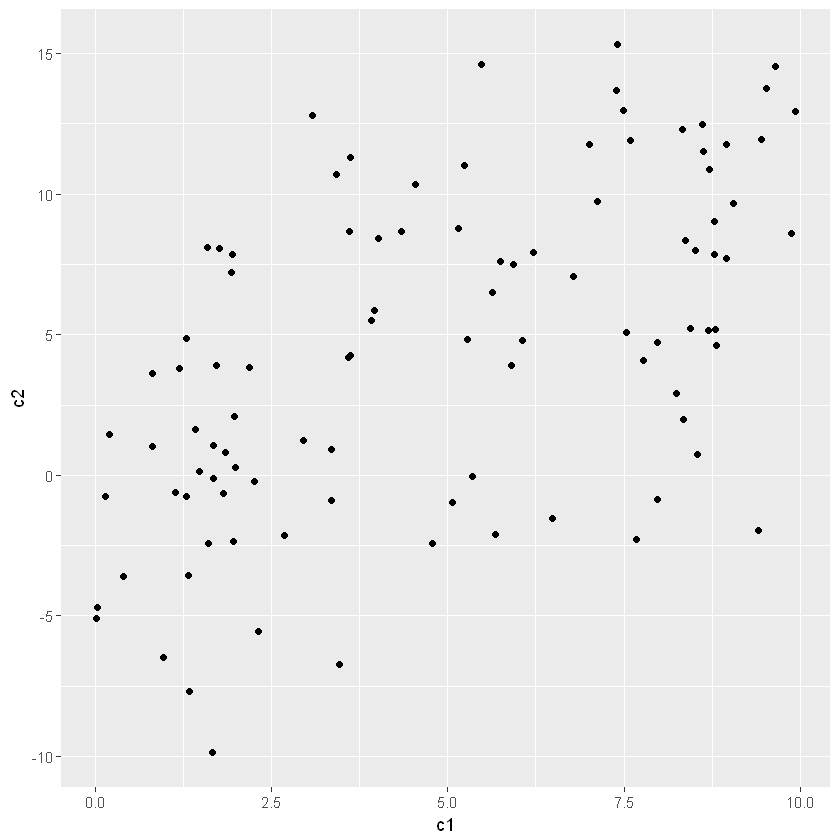

In [45]:
library(ggplot2)
ggplot(data=df)+
geom_point(mapping=aes(x=c1,y=c2))

**Calculate the *true* correlation of the population:**

In [47]:
(r<-cor(r1,r2))
cor.test(r1,r2)

[1] 0.5597695


	Pearson's product-moment correlation

data:  r1 and r2
t = 6.6873, df = 98, p-value = 1.407e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4082365 0.6812815
sample estimates:
      cor 
0.5597695 


**Sample 1:**

In [48]:
sample1<-df[1:10,]
rs1<-cor(sample1$c1,sample1$c2)
cor.test(sample1$c1,sample1$c2)


	Pearson's product-moment correlation

data:  sample1$c1 and sample1$c2
t = 0.9436, df = 8, p-value = 0.373
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.391086  0.788900
sample estimates:
      cor 
0.3164664 


Even though the correlation-coefficient is effectively larger than 0, the significance test suggests that the null-hypothesis should not be rejected (because of the large p-value).

**Sample 2:**

In [49]:
sample2<-df[20:30,]
rs1<-cor(sample2$c1,sample2$c2)
cor.test(sample2$c1,sample2$c2)


	Pearson's product-moment correlation

data:  sample2$c1 and sample2$c2
t = 1.4859, df = 9, p-value = 0.1715
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2126572  0.8242565
sample estimates:
      cor 
0.4438371 


Even though the correlation-coefficient is effectively larger than 0, the significance test suggests that the null-hypothesis should not be rejected (because of the large p-value).

**Sample 3:**

In [50]:
sample3<-df[30:40,]
rs1<-cor(sample3$c1,sample3$c2)
cor.test(sample3$c1,sample3$c2)


	Pearson's product-moment correlation

data:  sample3$c1 and sample3$c2
t = 2.9264, df = 9, p-value = 0.01686
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1693223 0.9149124
sample estimates:
      cor 
0.6982722 


If a confidence-threshold of $5%$ is applied the null-hypothesis can be rejected with this sample. The correlation estimated from the sample is higher than the *true* correlation of the population. 

### Visualization of Correlations
R's function *pairs()* plots a matrix of 2-dimensional correlations between columns of the given dataframe. 

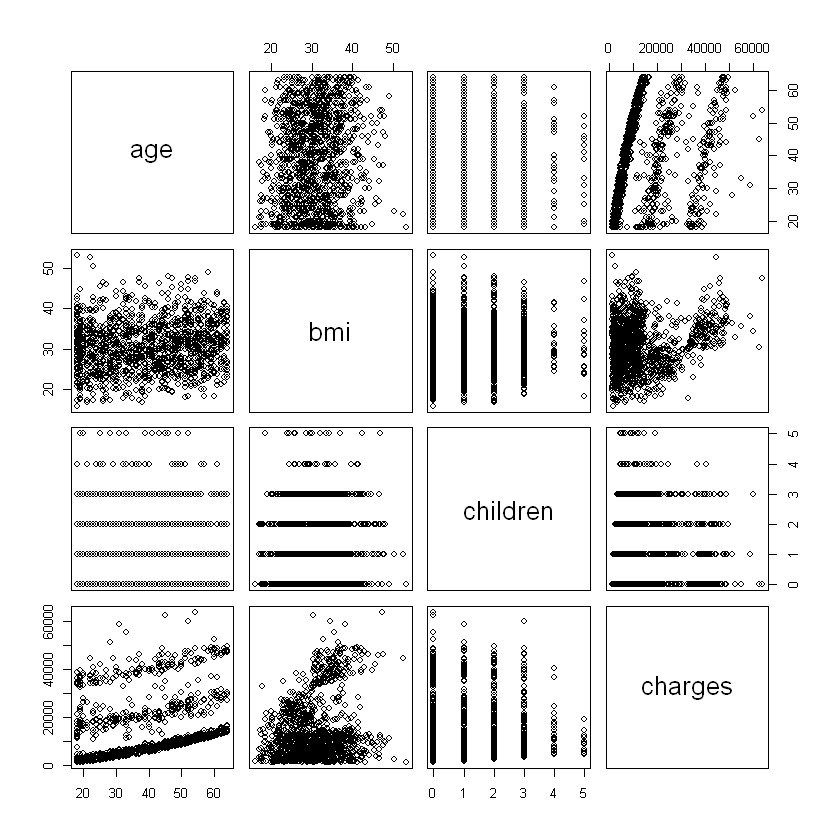

In [51]:
pairs(insurance[numeric_cols])